In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load CSV file
df = pd.read_csv('fred_data.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df[df['date'] >= '2004-01-01']
df = df.reset_index().set_index('date').drop(columns = 'index')
df

,US Grocery Sales,CPI (Food at Home),Real Disposable Income,Unemployment Rate,Initial Jobless Claims,Continued Jobless Claims,GDP,Personal Savings,Consumer Debt % DI,Credit Card Delinquency,Mortgage Delinquency,Oil Prices,Avg Home Price,Consumer Sentiment,PPI Final Food,PPI Food and Feed,PPI Finished Consumer Goods,PPI Food Manufacture,PPI Grocery,Retail Wages
date,,,,,,,,,,,,,,,,,,,,
2004-01-01,36402.0,183.300,11051.2,5.7,1801000.0,15741000.0,15248.680,404.1,6.368558,4.21,1.65,34.310000,140.706,103.8,NaN,146.400,148.400,139.300,121.300,NaN
2004-02-01,35890.0,183.700,11071.0,5.6,1443000.0,12459000.0,15248.680,405.1,6.368558,4.21,1.65,34.684737,142.028,94.4,NaN,147.300,148.700,140.400,125.700,NaN
2004-03-01,36365.0,184.100,11115.6,5.8,1368000.0,12185000.0,15248.680,397.3,6.368558,4.21,1.65,36.741304,144.079,95.8,NaN,149.400,150.800,142.400,125.200,NaN
2004-04-01,36312.0,184.300,11153.3,5.6,1393000.0,12003000.0,15366.850,430.7,6.307107,4.15,1.60,36.750000,146.180,94.2,NaN,153.300,153.200,146.100,123.100,NaN
2004-05-01,36528.0,186.600,11208.9,5.6,1681000.0,14878000.0,15366.850,432.0,6.307107,4.15,1.60,40.275000,148.336,90.2,NaN,156.100,155.300,149.100,122.200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,75140.0,307.201,17519.6,4.1,897000.0,7325000.0,23400.294,830.7,5.478743,3.20,1.74,70.236000,324.779,70.1,154.010,267.145,277.075,261.715,275.649,24.59
2024-10-01,75403.0,307.798,17584.7,4.1,948000.0,7494000.0,23536.293,881.0,5.512139,3.08,1.77,71.985000,324.211,70.5,153.151,266.221,274.717,260.666,278.592,24.73
2024-11-01,75235.0,308.881,17618.8,4.2,1095000.0,9417000.0,NaN,838.1,NaN,NaN,NaN,69.950000,323.690,71.8,156.413,267.942,281.591,262.259,278.045,24.93


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2004-01-01 to 2025-01-01
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   US Grocery Sales             253 non-null    float64
 1   CPI (Food at Home)           253 non-null    float64
 2   Real Disposable Income       253 non-null    float64
 3   Unemployment Rate            253 non-null    float64
 4   Initial Jobless Claims       252 non-null    float64
 5   Continued Jobless Claims     252 non-null    float64
 6   GDP                          250 non-null    float64
 7   Personal Savings             253 non-null    float64
 8   Consumer Debt % DI           250 non-null    float64
 9   Credit Card Delinquency      250 non-null    float64
 10  Mortgage Delinquency         250 non-null    float64
 11  Oil Prices                   252 non-null    float64
 12  Avg Home Price               252 non-null    float64
 13  C

In [29]:
rdi = pd.read_excel('RDI Analysis.xlsx')
rdi = rdi.set_index('observation_date')
rdi = rdi[['RDI_adj']]
rdi = rdi.rename(columns={'RDI_adj':'Real Disposable Income adj'})
rdi = rdi[(rdi.index >= '2004-01-01') & (rdi.index <= '2025-01-31')]
rdi

,Real Disposable Income adj
observation_date,
2004-01-01,11051.2
2004-02-01,11071.0
2004-03-01,11115.6
2004-04-01,11153.3
2004-05-01,11208.9
...,...
2024-09-01,17519.6
2024-10-01,17584.7
2024-11-01,17618.8


In [30]:
df = pd.merge(df, rdi, left_index=True, right_index=True, how='left')
df['US Grocery Sales_lag1'] = df['US Grocery Sales'].shift(1)
df

,US Grocery Sales,CPI (Food at Home),Real Disposable Income,Unemployment Rate,Initial Jobless Claims,Continued Jobless Claims,GDP,Personal Savings,Consumer Debt % DI,Credit Card Delinquency,...,Avg Home Price,Consumer Sentiment,PPI Final Food,PPI Food and Feed,PPI Finished Consumer Goods,PPI Food Manufacture,PPI Grocery,Retail Wages,Real Disposable Income adj,US Grocery Sales_lag1
date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,36402.0,183.300,11051.2,5.7,1801000.0,15741000.0,15248.680,404.1,6.368558,4.21,...,140.706,103.8,NaN,146.400,148.400,139.300,121.300,NaN,11051.2,NaN
2004-02-01,35890.0,183.700,11071.0,5.6,1443000.0,12459000.0,15248.680,405.1,6.368558,4.21,...,142.028,94.4,NaN,147.300,148.700,140.400,125.700,NaN,11071.0,36402.0
2004-03-01,36365.0,184.100,11115.6,5.8,1368000.0,12185000.0,15248.680,397.3,6.368558,4.21,...,144.079,95.8,NaN,149.400,150.800,142.400,125.200,NaN,11115.6,35890.0
2004-04-01,36312.0,184.300,11153.3,5.6,1393000.0,12003000.0,15366.850,430.7,6.307107,4.15,...,146.180,94.2,NaN,153.300,153.200,146.100,123.100,NaN,11153.3,36365.0
2004-05-01,36528.0,186.600,11208.9,5.6,1681000.0,14878000.0,15366.850,432.0,6.307107,4.15,...,148.336,90.2,NaN,156.100,155.300,149.100,122.200,NaN,11208.9,36312.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,75140.0,307.201,17519.6,4.1,897000.0,7325000.0,23400.294,830.7,5.478743,3.20,...,324.779,70.1,154.010,267.145,277.075,261.715,275.649,24.59,17519.6,74559.0
2024-10-01,75403.0,307.798,17584.7,4.1,948000.0,7494000.0,23536.293,881.0,5.512139,3.08,...,324.211,70.5,153.151,266.221,274.717,260.666,278.592,24.73,17584.7,75140.0
2024-11-01,75235.0,308.881,17618.8,4.2,1095000.0,9417000.0,NaN,838.1,NaN,NaN,...,323.690,71.8,156.413,267.942,281.591,262.259,278.045,24.93,17618.8,75403.0


### Describe the Data ###

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2004-01-01 to 2025-01-01
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   US Grocery Sales             253 non-null    float64
 1   CPI (Food at Home)           253 non-null    float64
 2   Real Disposable Income       253 non-null    float64
 3   Unemployment Rate            253 non-null    float64
 4   Initial Jobless Claims       252 non-null    float64
 5   Continued Jobless Claims     252 non-null    float64
 6   GDP                          250 non-null    float64
 7   Personal Savings             253 non-null    float64
 8   Consumer Debt % DI           250 non-null    float64
 9   Credit Card Delinquency      250 non-null    float64
 10  Mortgage Delinquency         250 non-null    float64
 11  Oil Prices                   252 non-null    float64
 12  Avg Home Price               252 non-null    float64
 13  C

In [32]:
print(df.index)

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01',
               '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01',
               '2024-12-01', '2025-01-01'],
              dtype='datetime64[ns]', name='date', length=253, freq=None)


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
US Grocery Sales,253.0,5.221552e+04,1.161713e+04,3.589000e+04,4.269100e+04,5.036900e+04,5.804900e+04,7.607100e+04
CPI (Food at Home),253.0,2.362510e+02,3.296435e+01,1.833000e+02,2.150640e+02,2.377140e+02,2.428930e+02,3.111780e+02
Real Disposable Income,253.0,1.400185e+04,2.027903e+03,1.105120e+04,1.227320e+04,1.344590e+04,1.569750e+04,2.044580e+04
Unemployment Rate,253.0,5.798024e+00,2.087614e+00,3.400000e+00,4.200000e+00,5.000000e+00,7.200000e+00,1.480000e+01
Initial Jobless Claims,252.0,1.633710e+06,1.496649e+06,7.910000e+05,1.066750e+06,1.338000e+06,1.683250e+06,1.865300e+07
Continued Jobless Claims,252.0,1.353083e+07,1.062924e+07,5.437000e+06,8.576500e+06,1.091100e+07,1.485725e+07,1.016320e+08
GDP,250.0,1.869287e+04,2.278572e+03,1.524868e+04,1.675977e+04,1.818591e+04,2.054879e+04,2.353629e+04
Personal Savings,253.0,8.490787e+02,6.924663e+02,1.289000e+02,5.698000e+02,7.451000e+02,9.410000e+02,5.981600e+03
Consumer Debt % DI,250.0,5.868489e+00,7.232003e-01,4.305925e+00,5.434135e+00,5.712078e+00,6.373640e+00,7.306876e+00
Credit Card Delinquency,250.0,3.217880e+00,1.222611e+00,1.530000e+00,2.332500e+00,2.710000e+00,4.010000e+00,6.770000e+00


### Missing Values, Duplicates, and Outliers ###

In [34]:
# Count total missing values per column
missing_counts = df.isna().sum()

# Show only columns with missing values
missing_counts = missing_counts[missing_counts > 0]

missing_counts

Initial Jobless Claims       1
Continued Jobless Claims     1
GDP                          3
Consumer Debt % DI           3
Credit Card Delinquency      3
Mortgage Delinquency         3
Oil Prices                   1
Avg Home Price               1
PPI Final Food              70
Retail Wages                26
US Grocery Sales_lag1        1
dtype: int64

In [35]:
# Check for duplicates
df.duplicated().sum()

0

In [36]:
# Identify outliers using IQR
cols = df.columns.tolist()

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)

IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

IQR_df = pd.DataFrame(
    {'Column': Q1.index,                        # Column names
    'Q1 (25th percentile)': Q1.values,          # Q1 values
    'Q3 (75th percentile)': Q3.values,          # Q3 values
    'IQR': IQR.values,                          # Interquartile range
    'Lower Whisker': lower_whisker.values,      # Lower whisker
    'Upper Whisker': upper_whisker.values})      # Upper whisker

#This provides the percent of values above or below the whiskers
((df[cols] < lower_whisker) | (df[cols] > upper_whisker)).sum() / len(df) * 100

US Grocery Sales                0.000000
CPI (Food at Home)             13.043478
Real Disposable Income          0.000000
Unemployment Rate               0.790514
Initial Jobless Claims          7.114625
Continued Jobless Claims        5.928854
GDP                             0.000000
Personal Savings                7.114625
Consumer Debt % DI              0.000000
Credit Card Delinquency         1.185771
Mortgage Delinquency            0.000000
Oil Prices                      0.000000
Avg Home Price                 11.857708
Consumer Sentiment              0.000000
PPI Final Food                 14.229249
PPI Food and Feed               3.162055
PPI Finished Consumer Goods     6.324111
PPI Food Manufacture            7.509881
PPI Grocery                     0.395257
Retail Wages                    0.000000
Real Disposable Income adj      0.000000
US Grocery Sales_lag1           0.000000
dtype: float64

### Visualizations ###

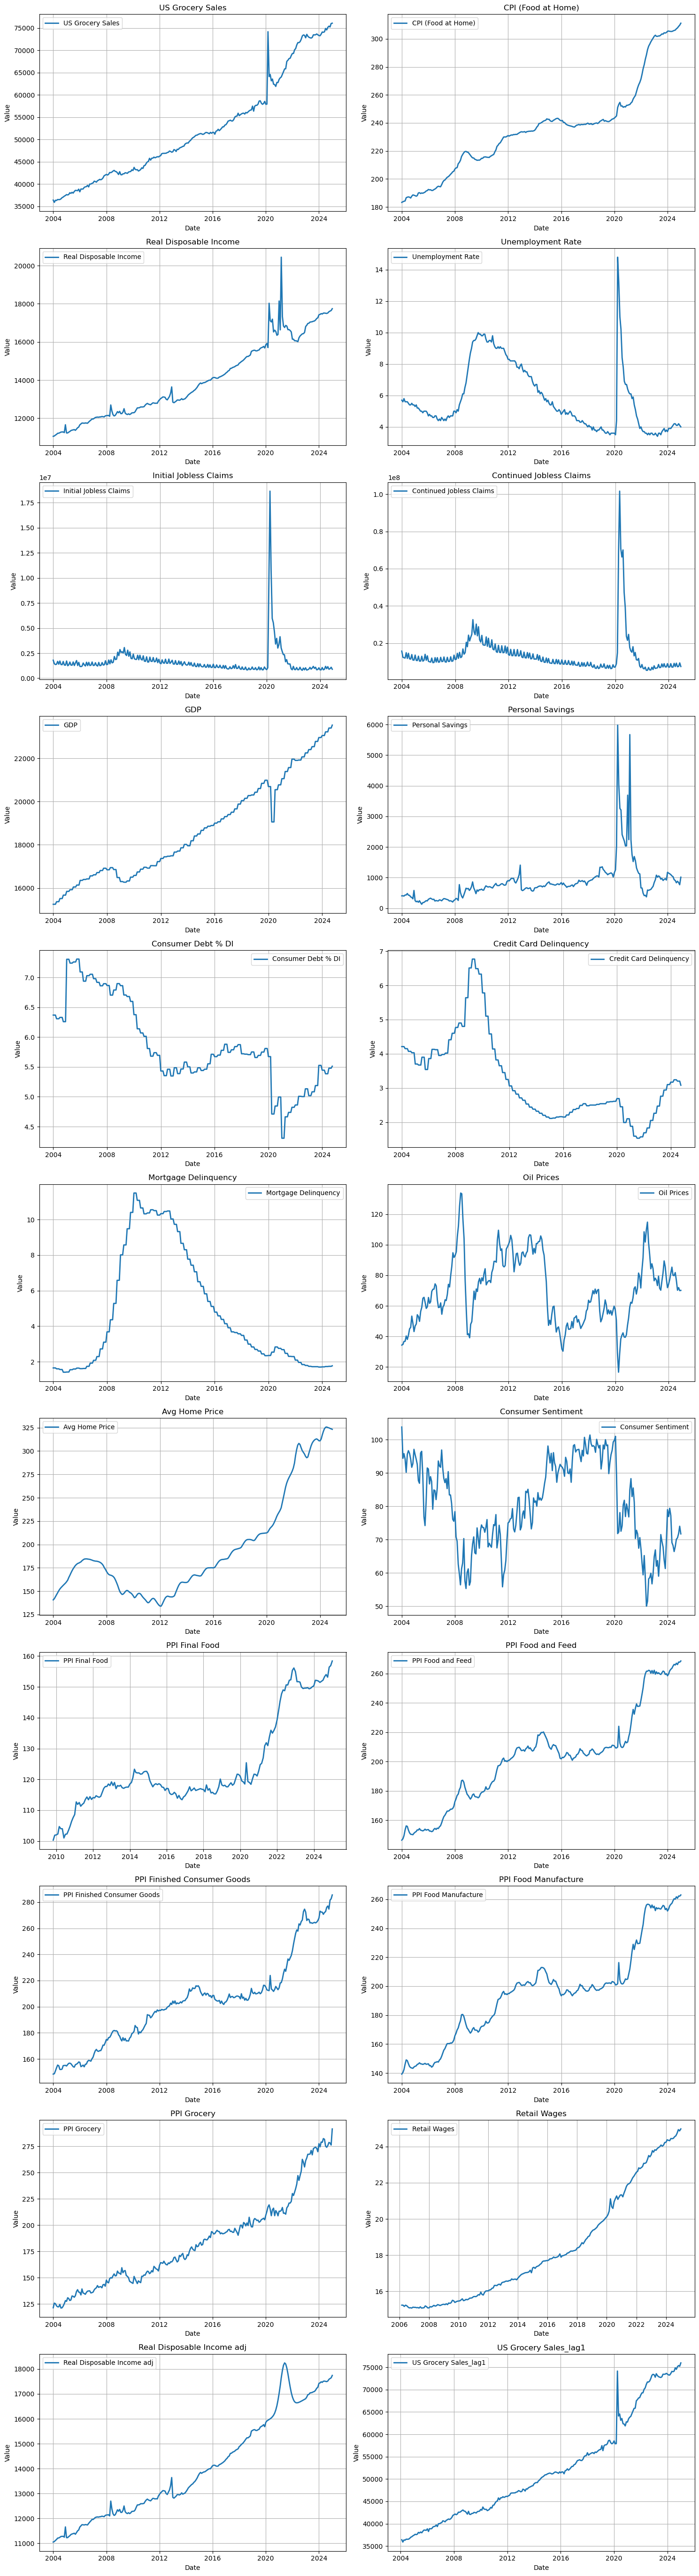

In [37]:
# Select the variables to plot (excluding 'date')
var_list = df.columns.tolist()

# Create a grid of subplots (2 columns × enough rows for all variables)
num_vars = len(var_list)
rows = (num_vars // 2) + (num_vars % 2)  # Ensures enough rows for all variables

fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 5 * rows))  # Dynamically sized

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each variable and plot
for i, col in enumerate(var_list):
    ax = axes[i]  # Select the subplot
    ax.plot(df.index, df[col], label=col, linewidth=2)
    
    # Customize the subplot
    ax.set_title(col, fontsize=12)
    ax.set_xlabel("Date", fontsize=10)
    ax.set_ylabel("Value", fontsize=10)
    ax.grid(True)
    ax.legend()

# Adjust layout for readability
plt.tight_layout()

# Show the plot
plt.show()


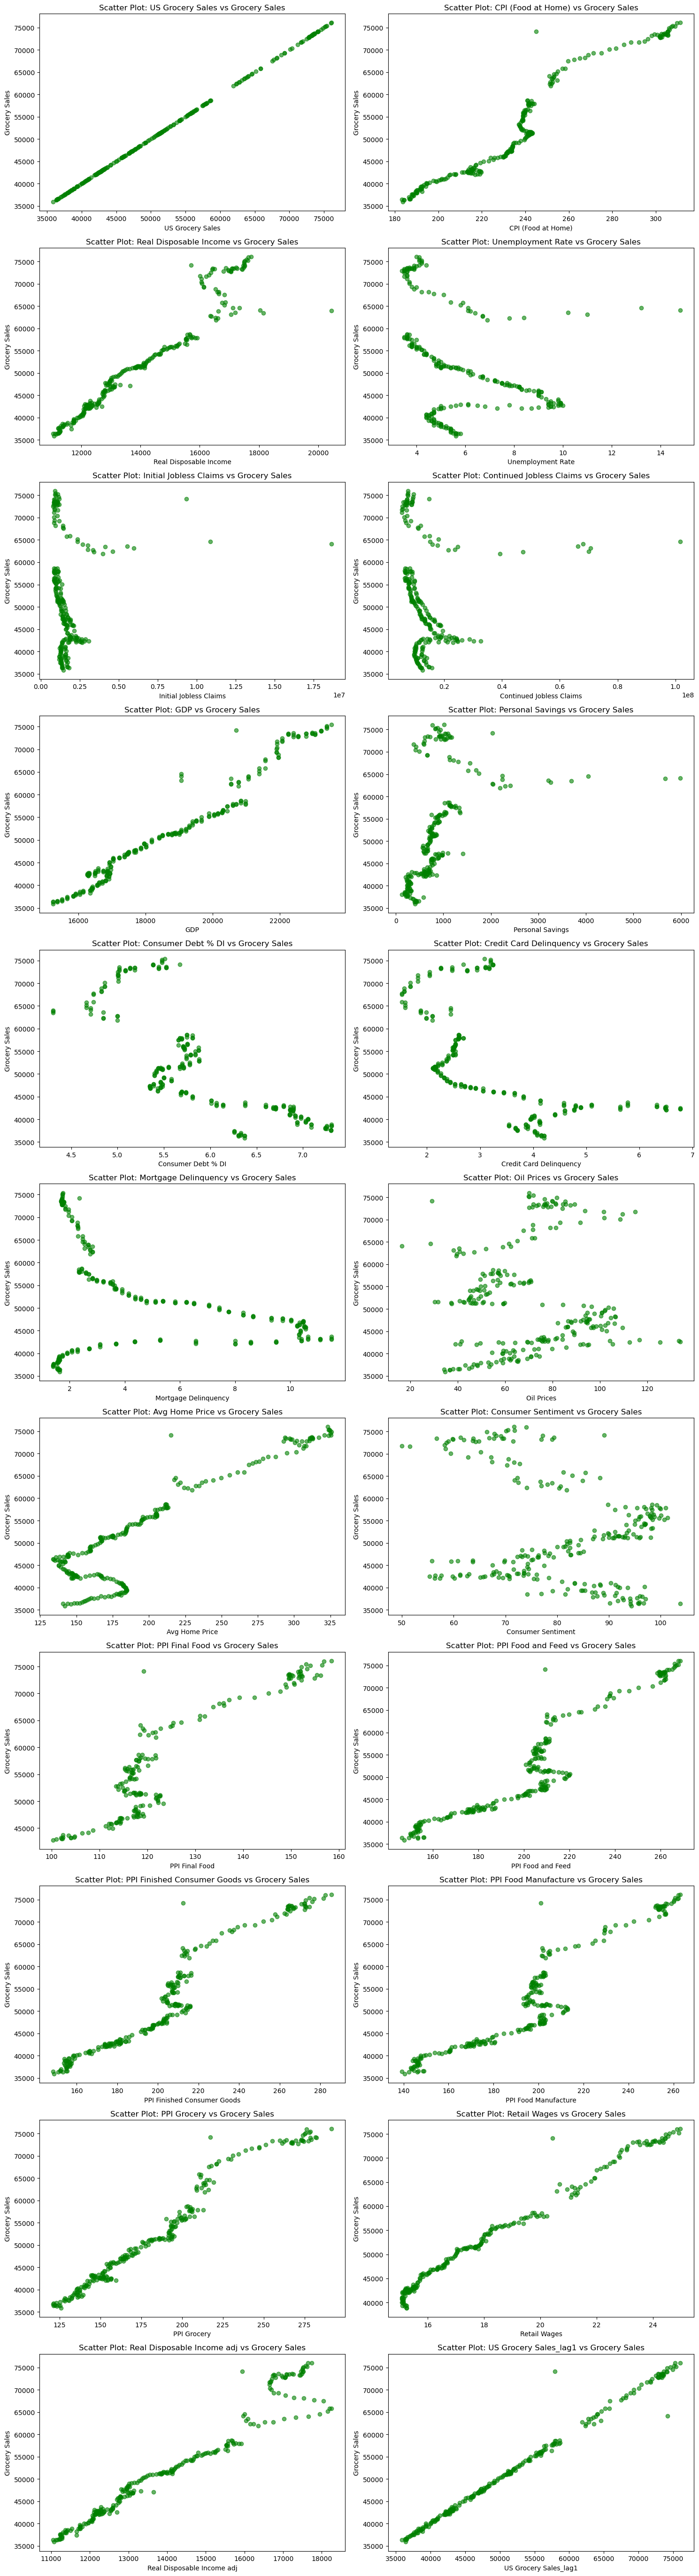

In [38]:
# Select independent variables (excluding index)
var_list = df.columns.tolist()  # Since 'date' is index, it's not included

# Create a grid of subplots (2 columns × enough rows for all variables)
num_vars = len(var_list)
rows = (num_vars // 2) + (num_vars % 2)  # Ensures enough rows for all variables

fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 5 * rows))  # Dynamically sized

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each variable and create scatter plots
for i, col in enumerate(var_list):
    ax = axes[i]
    ax.scatter(df[col], df['US Grocery Sales'], color='green', alpha=0.6)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Grocery Sales', fontsize=10)
    ax.set_title(f'Scatter Plot: {col} vs Grocery Sales')

# Hide empty subplots if `var_list` has an odd number of elements
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show all plots
plt.tight_layout()
plt.show()


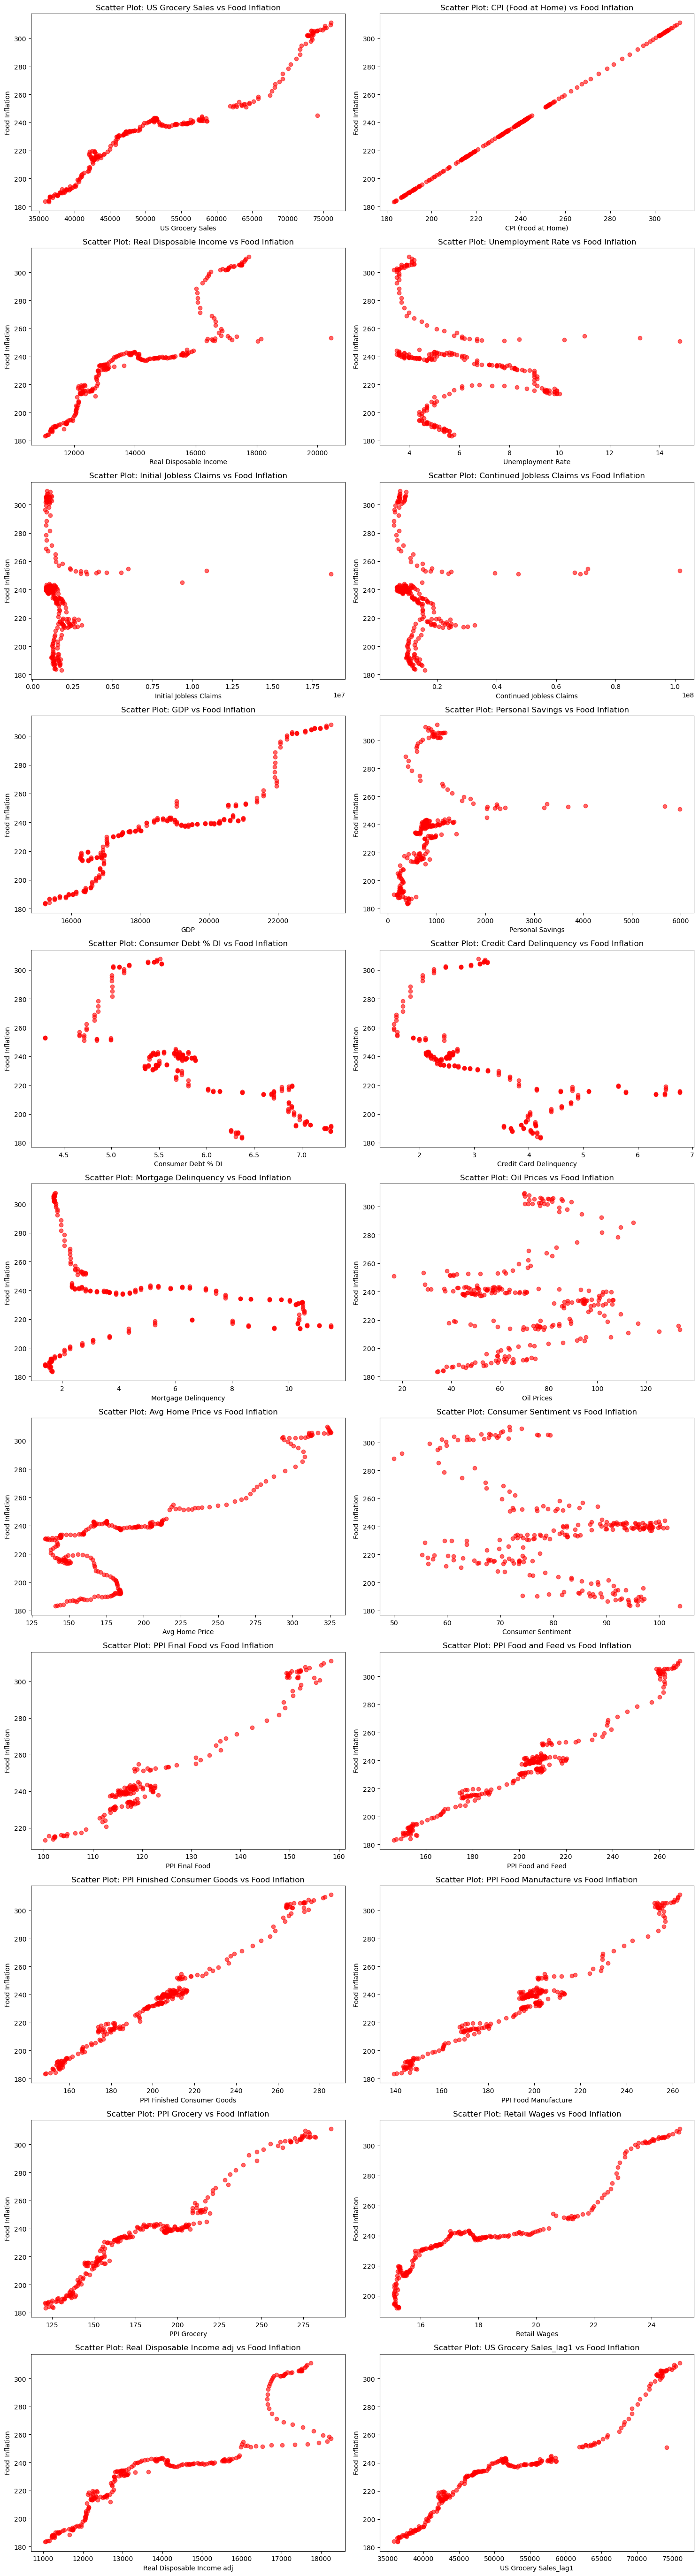

In [39]:
# Select independent variables (excluding index)
var_list = df.columns.tolist()  # Since 'date' is index, it's not included

# Create a grid of subplots (2 columns × enough rows for all variables)
num_vars = len(var_list)
rows = (num_vars // 2) + (num_vars % 2)  # Ensures enough rows for all variables

fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 5 * rows))  # Dynamically sized

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each variable and create scatter plots
for i, col in enumerate(var_list):
    ax = axes[i]
    ax.scatter(df[col], df['CPI (Food at Home)'], color='red', alpha=0.6)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Food Inflation', fontsize=10)
    ax.set_title(f'Scatter Plot: {col} vs Food Inflation')

# Hide empty subplots if `var_list` has an odd number of elements
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show all plots
plt.tight_layout()
plt.show()

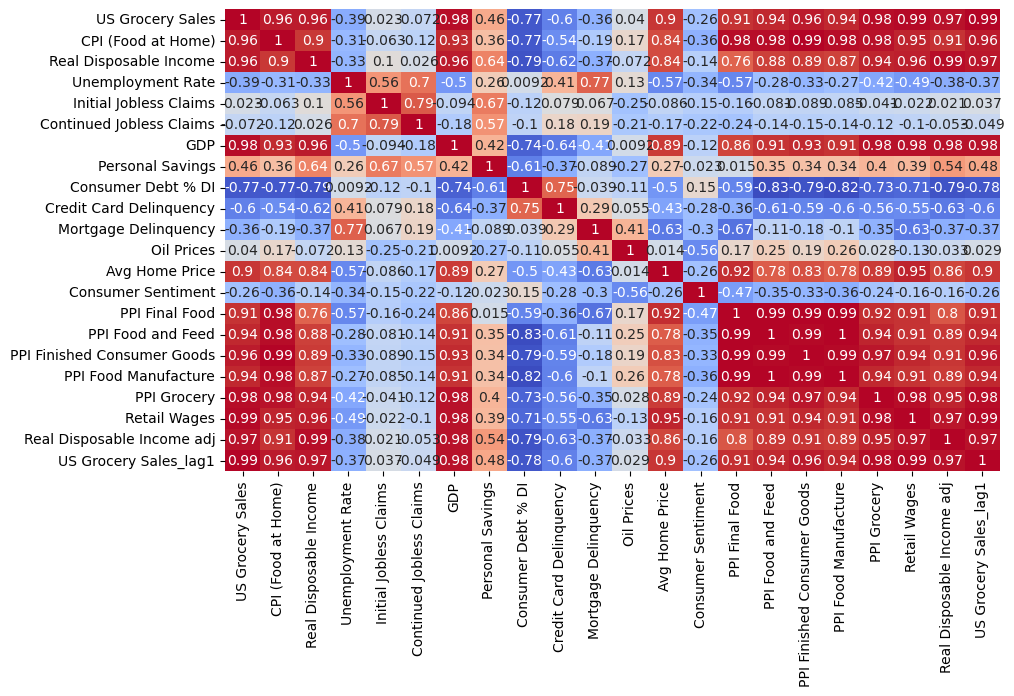

In [40]:
# Compute the correlation matrix
df_corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, cbar=False, cmap="coolwarm")
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2004-01-01 to 2025-01-01
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   US Grocery Sales             253 non-null    float64
 1   CPI (Food at Home)           253 non-null    float64
 2   Real Disposable Income       253 non-null    float64
 3   Unemployment Rate            253 non-null    float64
 4   Initial Jobless Claims       252 non-null    float64
 5   Continued Jobless Claims     252 non-null    float64
 6   GDP                          250 non-null    float64
 7   Personal Savings             253 non-null    float64
 8   Consumer Debt % DI           250 non-null    float64
 9   Credit Card Delinquency      250 non-null    float64
 10  Mortgage Delinquency         250 non-null    float64
 11  Oil Prices                   252 non-null    float64
 12  Avg Home Price               252 non-null    float64
 13  C

### Feature Creation ###

In [42]:
#feature creation

# Create first difference variables (applies to all numeric columns)
df_diff = df.diff().add_suffix('_diff')
df_diff = df_diff.bfill()

# Create YOY variables (applies to all numeric columns)
df_yoy = df.pct_change(periods=12, fill_method=None).add_suffix('_yoy') * 100  # Converts to percentage

# Create dummy1 for dates between 2/29/2020 and 4/30/2020. A boolean consition with a .astype(int) will return a 1 for True and 0 for false
df['covid1'] = ((df.index >= '2020-02-01') & (df.index <= '2020-04-01')).astype(int)

# Create dummy2 for dates between 5/31/2020 and 10/31/2020
df['covid2'] = ((df.index >= '2020-05-01') & (df.index <= '2020-10-01')).astype(int)

# reduce grocery sales for March 2020
df.loc[df.index == '2020-03-01', 'US Grocery Sales'] = 61000 


In [43]:
df = pd.concat([df, df_diff, df_yoy], axis=1)

In [44]:
for col in df.columns:
    print(col)

US Grocery Sales
CPI (Food at Home)
Real Disposable Income
Unemployment Rate
Initial Jobless Claims
Continued Jobless Claims
GDP
Personal Savings
Consumer Debt % DI
Credit Card Delinquency
Mortgage Delinquency
Oil Prices
Avg Home Price
Consumer Sentiment
PPI Final Food
PPI Food and Feed
PPI Finished Consumer Goods
PPI Food Manufacture
PPI Grocery
Retail Wages
Real Disposable Income adj
US Grocery Sales_lag1
covid1
covid2
US Grocery Sales_diff
CPI (Food at Home)_diff
Real Disposable Income_diff
Unemployment Rate_diff
Initial Jobless Claims_diff
Continued Jobless Claims_diff
GDP_diff
Personal Savings_diff
Consumer Debt % DI_diff
Credit Card Delinquency_diff
Mortgage Delinquency_diff
Oil Prices_diff
Avg Home Price_diff
Consumer Sentiment_diff
PPI Final Food_diff
PPI Food and Feed_diff
PPI Finished Consumer Goods_diff
PPI Food Manufacture_diff
PPI Grocery_diff
Retail Wages_diff
Real Disposable Income adj_diff
US Grocery Sales_lag1_diff
US Grocery Sales_yoy
CPI (Food at Home)_yoy
Real Dispo

### Lag Variable Analysis ###

In [45]:
# 1) create lagged variables
lag_vars = ['CPI (Food at Home)_yoy', 'Real Disposable Income adj_yoy', 'Unemployment Rate_yoy', 'Initial Jobless Claims_yoy', 'Continued Jobless Claims_yoy',
            'GDP_yoy', 'Personal Savings_yoy', 'Consumer Debt % DI_yoy', 'Credit Card Delinquency_yoy', 'Mortgage Delinquency_yoy', 'Oil Prices_yoy',
            'Avg Home Price_yoy', 'Consumer Sentiment_yoy', 'PPI Final Food_yoy', 'PPI Food and Feed_yoy', 'PPI Finished Consumer Goods_yoy',
            'PPI Food Manufacture_yoy', 'PPI Grocery_yoy', 'Retail Wages_yoy']

lags = range(1, 13)

lagged_cols = {}

for lag_var in lag_vars:
    for lag in lags:
        col_name = f'{lag_var}_lag{lag}'
        lagged_cols[col_name] = df[lag_var].shift(lag)

# Add all lagged columns at once using concat
df = pd.concat([df, pd.DataFrame(lagged_cols, index=df.index)], axis=1)

In [46]:
for col in df.columns:
    print(col)

US Grocery Sales
CPI (Food at Home)
Real Disposable Income
Unemployment Rate
Initial Jobless Claims
Continued Jobless Claims
GDP
Personal Savings
Consumer Debt % DI
Credit Card Delinquency
Mortgage Delinquency
Oil Prices
Avg Home Price
Consumer Sentiment
PPI Final Food
PPI Food and Feed
PPI Finished Consumer Goods
PPI Food Manufacture
PPI Grocery
Retail Wages
Real Disposable Income adj
US Grocery Sales_lag1
covid1
covid2
US Grocery Sales_diff
CPI (Food at Home)_diff
Real Disposable Income_diff
Unemployment Rate_diff
Initial Jobless Claims_diff
Continued Jobless Claims_diff
GDP_diff
Personal Savings_diff
Consumer Debt % DI_diff
Credit Card Delinquency_diff
Mortgage Delinquency_diff
Oil Prices_diff
Avg Home Price_diff
Consumer Sentiment_diff
PPI Final Food_diff
PPI Food and Feed_diff
PPI Finished Consumer Goods_diff
PPI Food Manufacture_diff
PPI Grocery_diff
Retail Wages_diff
Real Disposable Income adj_diff
US Grocery Sales_lag1_diff
US Grocery Sales_yoy
CPI (Food at Home)_yoy
Real Dispo

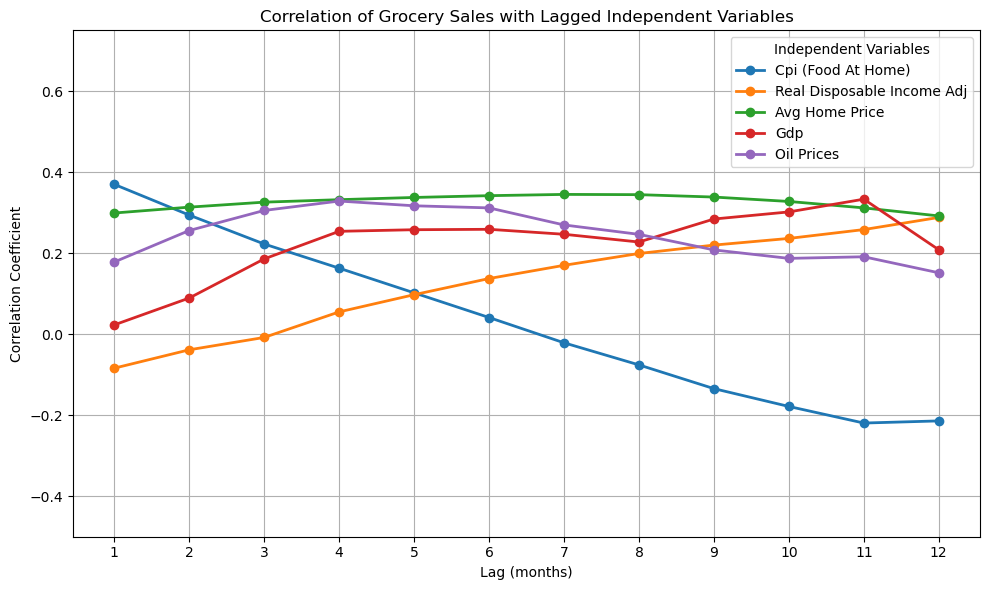

In [47]:
lags = range(1, 13)

# 1) Define target and independent variable names
target_var = 'US Grocery Sales_yoy'
ind_vars = ['CPI (Food at Home)_yoy', 'Real Disposable Income adj_yoy', 'Avg Home Price_yoy', 'GDP_yoy', 'Oil Prices_yoy']

# Dictionary to store results
correlation_results = {}

for ind_var in ind_vars:
    lag_cols = []
    for lag in lags:
        lag_col = f'{ind_var}_lag{lag}'
        lag_cols.append(lag_col)

    # Compute correlation matrix with lagged variables
    corrs = df[[target_var] + lag_cols].corr()
    corr_values = corrs.loc[target_var, lag_cols]
    correlation_results[ind_var] = corr_values.values

# Convert to DataFrame
corr_df_ind = pd.DataFrame(correlation_results, index=[f'lag{lag}' for lag in lags])

# 2) Plot the results
plt.figure(figsize=(10, 6))

for i, column in enumerate(corr_df_ind.columns):
    plt.plot(lags, corr_df_ind.iloc[:, i], marker='o', linewidth=2,
             label=column.replace('_yoy', '').replace('_', ' ').title())

plt.title('Correlation of Grocery Sales with Lagged Independent Variables')
plt.xlabel('Lag (months)')
plt.ylabel('Correlation Coefficient')
plt.xticks(lags)
plt.ylim(-0.5, 0.75)
plt.legend(title="Independent Variables", loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

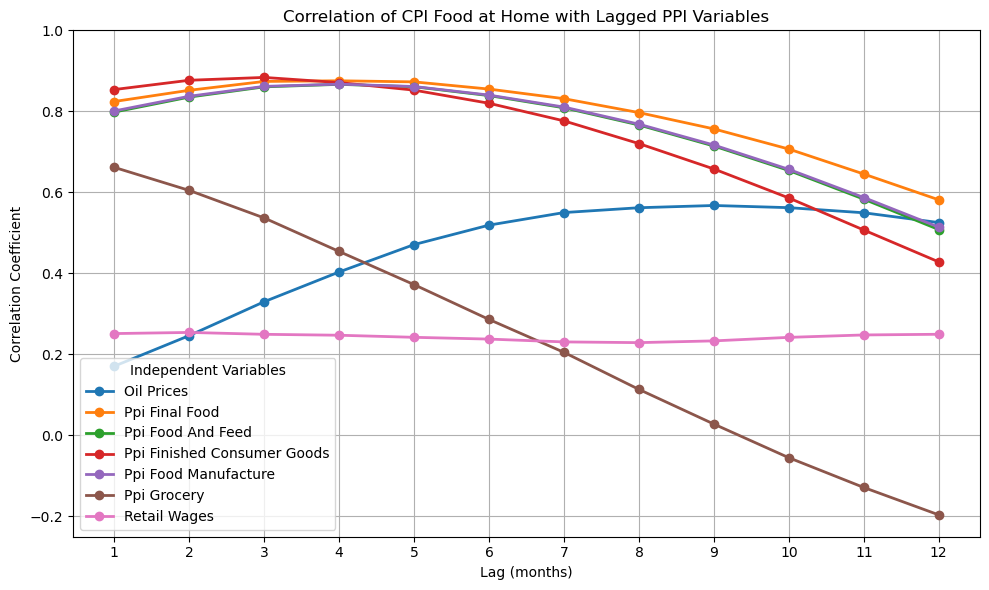

In [48]:
lags = range(1, 13)

# 1) define vars
ppi_vars = ['Oil Prices_yoy', 'PPI Final Food_yoy', 'PPI Food and Feed_yoy', 'PPI Finished Consumer Goods_yoy', 'PPI Food Manufacture_yoy', 
            'PPI Grocery_yoy', 'Retail Wages_yoy']
target_var = 'CPI (Food at Home)_yoy'

# Dictionary to store results
correlation_results = {}

for ppi_var in ppi_vars:
    lag_cols = []
    for lag in lags:
        lag_col = f'{ppi_var}_lag{lag}'
        lag_cols.append(lag_col)

    # Compute correlation matrix with lagged variables
    corrs = df[[target_var] + lag_cols].corr()
    corr_values = corrs.loc[target_var, lag_cols]
    correlation_results[ppi_var] = corr_values.values

# Convert to DataFrame
corr_df_ppi = pd.DataFrame(correlation_results, index=[f'lag{lag}' for lag in lags])

# 2) Plot the results
plt.figure(figsize=(10, 6))

for i, column in enumerate(corr_df_ppi.columns):
    plt.plot(lags, corr_df_ppi.iloc[:, i], marker='o', linewidth=2,
             label=column.replace('_yoy', '').replace('_', ' ').title())

plt.title('Correlation of CPI Food at Home with Lagged PPI Variables')
plt.xlabel('Lag (months)')
plt.ylabel('Correlation Coefficient')
plt.xticks(lags)
plt.ylim(-0.25, 1)
plt.legend(title="Independent Variables", loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
df.to_csv('grocery_dataset_eda.csv', index = True)